# Time Stepping Verification

In [2]:
include("RK_Functions.jl")

get_rk_constants (generic function with 1 method)

In [3]:
function linear(x)
    return -x
end

linear (generic function with 1 method)

In [12]:
u = zeros(2,1);
e_test = zeros(2,4)
u[1,1] = 1.0;

In [13]:
u_next = u;
for i in 1:10
    u_next = take_timestep_array(linear, 0, u_next, .1)
end
e_test[1,1] = 0.1;
e_test[2,1] = abs(exp(-1)-u_next[1])

0.032991773012228554

In [14]:
u_next = u;
for i in 1:100
    u_next = take_timestep_array(linear, 0, u_next, .01)
end
e_test[1,2] = 0.01;
e_test[2,2] = abs(exp(-1)-u_next[1])

0.0030962574293729728

In [15]:
u_next = u;
for i in 1:1000
    u_next = take_timestep_array(linear, 0, u_next, .001)
end
e_test[1,3] = 0.001;
e_test[2,3] = abs(exp(-1)-u_next[1])

0.00030757653280266695

In [16]:
u_next = u;
for i in 1:10000
    u_next = take_timestep_array(linear, 0, u_next, .0001)
end
e_test[1,4] = 0.0001;
e_test[2,4] = abs(exp(-1)-u_next[1])

3.0737153650262083e-5

In [24]:
using Pkg
Pkg.add("PyPlot")
using PyPlot

 Resolving package versions...
  Updating `C:\Users\mwatwood\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\mwatwood\.julia\environments\v1.2\Manifest.toml`
 [no changes]


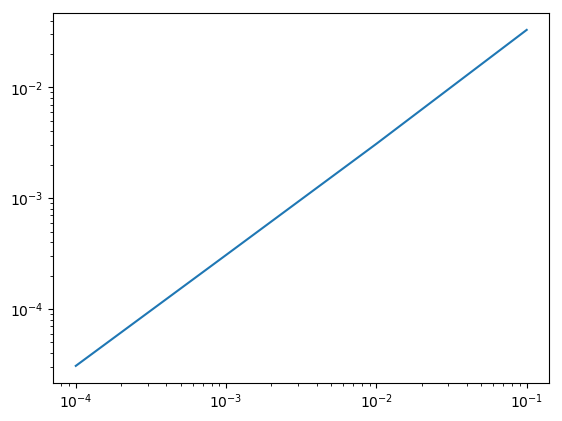

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000002626BA8>

In [25]:
loglog(e_test[1,:], e_test[2,:])